In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 

In [4]:
dataset = pd.read_csv(r"C:\Users\Satyajeet\Desktop\UM_3\TCS_stock_history.csv")
dataset

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0
...,...,...,...,...,...,...,...,...
4458,2021-09-24,3890.000000,3944.399902,3855.000000,3871.300049,2320754,0.0,0.0
4459,2021-09-27,3900.000000,3904.000000,3802.899902,3836.949951,1673362,0.0,0.0
4460,2021-09-28,3850.000000,3850.000000,3751.250000,3779.149902,2253075,0.0,0.0
4461,2021-09-29,3759.800049,3806.000000,3722.149902,3791.899902,2489161,0.0,0.0


In [5]:
dataset.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')

In [6]:
import datetime 
dataset['Date'] = pd.to_datetime(dataset['Date'])

# Extract useful numeric features
dataset['Year'] = dataset['Date'].dt.year
dataset['Month'] = dataset['Date'].dt.month
dataset['Day'] = dataset['Date'].dt.day
dataset['DayOfWeek'] = dataset['Date'].dt.dayofweek  # 0 = Monday, 6 = Sunday
dataset['DayOfYear'] = dataset['Date'].dt.dayofyear
dataset['IsMonthStart'] = dataset['Date'].dt.is_month_start.astype(int)
dataset['IsMonthEnd'] = dataset['Date'].dt.is_month_end.astype(int)

# Now drop the original date column if you want
dataset = dataset.drop('Date', axis=1)

In [7]:
dataset.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
Year            0
Month           0
Day             0
DayOfWeek       0
DayOfYear       0
IsMonthStart    0
IsMonthEnd      0
dtype: int64

In [8]:
dataset.head(4)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,Month,Day,DayOfWeek,DayOfYear,IsMonthStart,IsMonthEnd
0,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0,2002,8,12,0,224,0,0
1,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0,2002,8,13,1,225,0,0
2,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0,2002,8,14,2,226,0,0
3,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0,2002,8,15,3,227,0,0


In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error , r2_score

X = dataset.drop(['Close'], axis=1)
y = dataset['Close']


In [12]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.2 ,random_state=42)

In [13]:
model = RandomForestRegressor(n_estimators=200, random_state=42)

# Train
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

RMSE: 9.32
R² Score: 0.9999


c:\Users\Satyajeet\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [15]:
model.score(X_train,y_train)*100 , model.score(X_test,y_test)*100

(99.99778941005084, 99.98682610007775)

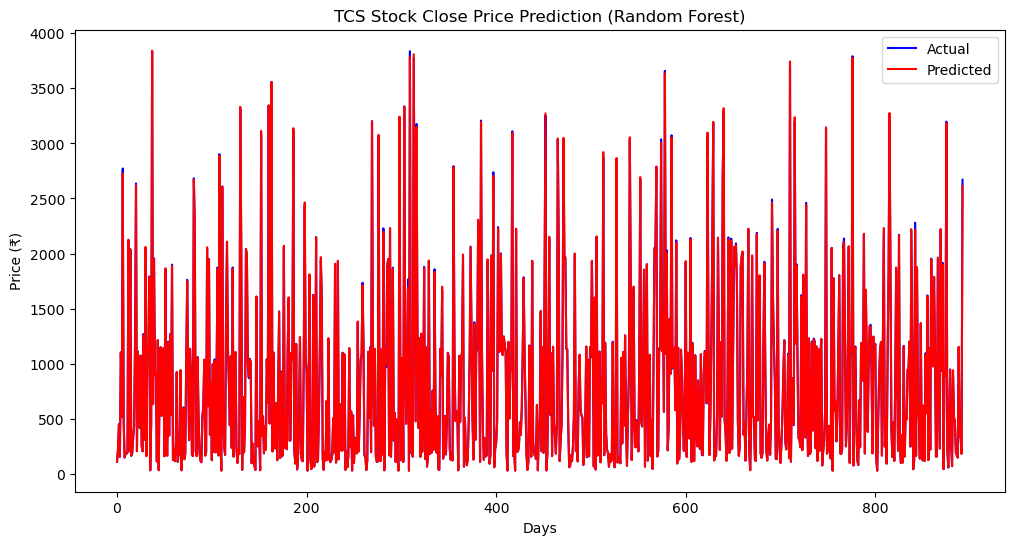

In [16]:
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='red')
plt.title('TCS Stock Close Price Prediction (Random Forest)')
plt.xlabel('Days')
plt.ylabel('Price (₹)')
plt.legend()
plt.show()


In [17]:
new_prediction = pd.DataFrame({
    "Open": [28],
    "High": [28],
    "Low": [21],
    "Volume": [200000],
    "Dividends": [0],
    "Stock Splits": [0],
    "Year": [2003],
    "Month": [1],
    "Day": [1],
    "DayOfWeek": [1],
    "DayOfYear": [1],
    "IsMonthStart": [1],
    "IsMonthEnd": [0]
})

In [18]:
predicted_close = model.predict(new_prediction)[0]

In [19]:
print(f"The predicted close is : {predicted_close}")

The predicted close is : 27.33637985229492


In [21]:
import joblib

# Save model
joblib.dump(model, 'tcs_stock_model.pkl')



['tcs_stock_model.pkl']